In [1]:
import pandas as pd
import joblib




data = pd.read_csv('data_analyst_salary_2024.csv')

data['salary'].isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_type         1194 non-null   object 
 1   job_location     1194 non-null   object 
 2   analyst_type     1194 non-null   object 
 3   company_type     1209 non-null   object 
 4   is_manager       1194 non-null   object 
 5   is_python        611 non-null    object 
 6   is_data_analyst  1210 non-null   object 
 7   is_ml            1194 non-null   object 
 8   is_sql           1194 non-null   object 
 9   is_full_time     1129 non-null   object 
 10  education        1192 non-null   object 
 11  viz_tool         1192 non-null   object 
 12  year_of_surv     1210 non-null   int64  
 13  exp              1194 non-null   float64
 14  salary           1115 non-null   float64
dtypes: float64(2), int64(1), object(12)
memory usage: 141.9+ KB


In [2]:
data.dropna(subset=['salary'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1115 entries, 1 to 1209
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_type         1115 non-null   object 
 1   job_location     1115 non-null   object 
 2   analyst_type     1115 non-null   object 
 3   company_type     1114 non-null   object 
 4   is_manager       1115 non-null   object 
 5   is_python        575 non-null    object 
 6   is_data_analyst  1115 non-null   object 
 7   is_ml            1115 non-null   object 
 8   is_sql           1115 non-null   object 
 9   is_full_time     1109 non-null   object 
 10  education        1113 non-null   object 
 11  viz_tool         1113 non-null   object 
 12  year_of_surv     1115 non-null   int64  
 13  exp              1115 non-null   float64
 14  salary           1115 non-null   float64
dtypes: float64(2), int64(1), object(12)
memory usage: 139.4+ KB


In [3]:
for column in data.columns:
    # Check if the column is of object type
    if data[column].dtype == 'object':
        print(f"Value counts for {column}:")
        print(data[column].value_counts())
        print("\n")  # Print a new line for readability between columns

Value counts for job_type:
job_type
שכירה             1037
שכיר                62
לא מועסקת כרגע      11
לא מועסק כרגע        4
עצמאית               1
Name: count, dtype: int64


Value counts for job_location:
job_location
אזור תל אביב    557
מרכז            387
אזור ירושלים     61
אזור חיפה        31
צפון             28
עבודה מהבית      24
אזור השפלה       12
דרום              9
אזור באר שבע      6
Name: count, dtype: int64


Value counts for analyst_type:
analyst_type
All kind of data analysis    348
Business analyst             179
Product                      168
BI                           118
Financial Analyst            102
Marketing                     73
other                         72
Data sceintist                26
Web Analyst                   16
Fraud Analyst                 13
Name: count, dtype: int64


Value counts for company_type:
company_type
הייטק             435
תעשייה ישראלית    333
הייטק (גלובלי)    263
אחר                40
צהל                22
ממשלתיח      

In [4]:
data= data.loc[data['job_type'].isin(['שכירה', 'שכיר'])]
data.drop(columns=['job_type'], inplace=True)
data.loc[data['job_location'].isin(['צפון','דרום','אזור חיפה','אזור ירושלים','אזור באר שבע', 'אזור השפלה']), 'job_location'] = 'שאר הטארץ'
data.loc[data['analyst_type'].isin(['Web Analyst', 'Fraud Analyst','All kind of data analysis','Product']), 'analyst_type'] = 'Business analyst'

data.loc[data['company_type'].isin(['צהל', 'ממשלתיח']), 'company_type'] = 'אחר'
data.loc[data['company_type'].isin(['הייטק (גלובלי)']), 'company_type'] = 'הייטק'


data = data.drop(columns=['is_data_analyst'])
data = data[data['is_full_time'] == 'מלאה']
data.drop(columns=['is_full_time'], inplace=True)
data['is_python'] = data['is_python'].fillna('no_data')
data['education'] = data['education'].fillna('אחר')
data['viz_tool'] = data['viz_tool'].fillna('no_data')

data.loc[data['education'].isin(['מנהל עסקים','חשבונאות','כלכלה']), 'education'] = 'כלכלה / פיננסים / חשבונאות/מנהל עסקים'
data.loc[data['education'].isin(['מדעי הטבע','מדעי המחשב']), 'education'] = 'מדעים מדויקים'
data.loc[data['education'].isin(['הנדסת תעשיה וניהול','מערכות מידע']), 'education'] = 'הנדסה תעששיייה וניהול/ מערכות מידע'

data.loc[data['viz_tool'].isin(['Redash','Google Data studio','1','Mixpanel','Grafana','no_data']), 'viz_tool'] = 'Other'
data.loc[data['viz_tool'].isin(['Looker','Qlik','Python/R']), 'viz_tool'] = 'Looker/Qlik/Python/R'





In [5]:
for column in data.columns:
    # Check if the column is of object type
    if data[column].dtype == 'object':
        print(f"Value counts for {column}:")
        print(data[column].value_counts())
        print("\n")  # Print a new line for readability between columns

Value counts for job_location:
job_location
אזור תל אביב    531
מרכז            360
שאר הטארץ       129
עבודה מהבית      22
Name: count, dtype: int64


Value counts for analyst_type:
analyst_type
Business analyst     678
BI                   111
Financial Analyst     95
Marketing             71
other                 64
Data sceintist        23
Name: count, dtype: int64


Value counts for company_type:
company_type
הייטק             652
תעשייה ישראלית    321
אחר                69
Name: count, dtype: int64


Value counts for is_manager:
is_manager
לא    842
כן    200
Name: count, dtype: int64


Value counts for is_python:
is_python
no_data          508
לא               269
כן               165
לעיתים נדירות    100
Name: count, dtype: int64


Value counts for is_ml:
is_ml
לא               634
לעיתים נדירות    227
כן               181
Name: count, dtype: int64


Value counts for is_sql:
is_sql
כן               819
לא               147
לעיתים נדירות     76
Name: count, dtype: int64


Value 

In [6]:
data.info()
# data.to_csv('data_for_cheat_gpt.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 1042 entries, 1 to 1209
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job_location  1042 non-null   object 
 1   analyst_type  1042 non-null   object 
 2   company_type  1042 non-null   object 
 3   is_manager    1042 non-null   object 
 4   is_python     1042 non-null   object 
 5   is_ml         1042 non-null   object 
 6   is_sql        1042 non-null   object 
 7   education     1042 non-null   object 
 8   viz_tool      1042 non-null   object 
 9   year_of_surv  1042 non-null   int64  
 10  exp           1042 non-null   float64
 11  salary        1042 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 105.8+ KB


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Load your data


# Drop unnecessary columns and convert 'year_of_surv' to a string
data['year_of_surv'] = data['year_of_surv'].astype(str)
col=['company_type','is_manager','is_sql','is_ml','year_of_surv','exp','viz_tool','job_location','analyst_type']
# Identify categorical and numerical columns
categorical_cols = data[col].select_dtypes(include=['object']).columns.tolist()
numerical_cols = ['exp']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols),

    ])

# Split the data
X = data.drop('salary', axis=1)
X = data[col]
y = data['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Initialize and train models
models = {
    "Linear Regression": LinearRegression(),
#     "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    y_train_pred = model.predict(X_train_preprocessed)
    y_test_pred = model.predict(X_test_preprocessed)
    
    train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
    print(f"{name} - Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")

# Attempt to train an XGBoost model with adjusted parameters
xgboost_adjusted = XGBRegressor(learning_rate= 0.1, max_depth= 4, n_estimators= 100,subsample= 0.8, random_state=42)
xgboost_adjusted = XGBRegressor(n_estimators=100, max_depth=3,min_samples_leaf= 1, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)

xgboost_adjusted.fit(X_train_preprocessed, y_train)
y_train_pred_xgb_adj = xgboost_adjusted.predict(X_train_preprocessed)
y_test_pred_xgb_adj = xgboost_adjusted.predict(X_test_preprocessed)

train_rmse_xgb_adj = sqrt(mean_squared_error(y_train, y_train_pred_xgb_adj))
test_rmse_xgb_adj = sqrt(mean_squared_error(y_test, y_test_pred_xgb_adj))
print(f"XGBoost (Adjusted) - Train RMSE: {train_rmse_xgb_adj}, Test RMSE: {test_rmse_xgb_adj}")
# xgboost_adjusted
joblib.dump(xgboost_adjusted,'model.pkl')
joblib.dump(preprocessor, 'preprocessor.joblib')

Linear Regression - Train RMSE: 5792.057897113151, Test RMSE: 4788.200603788463
Gradient Boosting - Train RMSE: 4743.005224286236, Test RMSE: 4741.932506592513
XGBoost (Adjusted) - Train RMSE: 4799.9299957440335, Test RMSE: 4618.726844065215


/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:31:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


['preprocessor.joblib']

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np


def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Make scorer and negate since GridSearchCV looks for maximum score
# rmse_scorer = make_scorer(rmse, greater_is_better=False)


# Example parameter grid
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3,4],
    'min_samples_split': [3],
    'min_samples_leaf': [3]
}



# Initialize the estimator
gbr = GradientBoostingRegressor(random_state=42)


# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols),

    ])

# Split the data
X = data.drop('salary', axis=1)
X = data[col]
y = data['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


    
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit it to your data
grid_search.fit(X_train_preprocessed, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

# Best score achieved
print("Best score:", np.sqrt(-grid_search.best_score_))

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_preprocessed)
y_train_pred = best_model.predict(X_train_preprocessed)

test_rmse = rmse(y_test, y_test_pred)
train_rmse = rmse(y_train, y_train_pred)

joblib.dump(best_model,'model.pkl')
joblib.dump(preprocessor, 'preprocessor.joblib')

print(f"RMSE on Test Data: {test_rmse}")
print(f"RMSE on Train Data: {train_rmse}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
Best score: 6248.633830867754
RMSE on Test Data: 4694.696754960545
RMSE on Train Data: 4792.21452246687


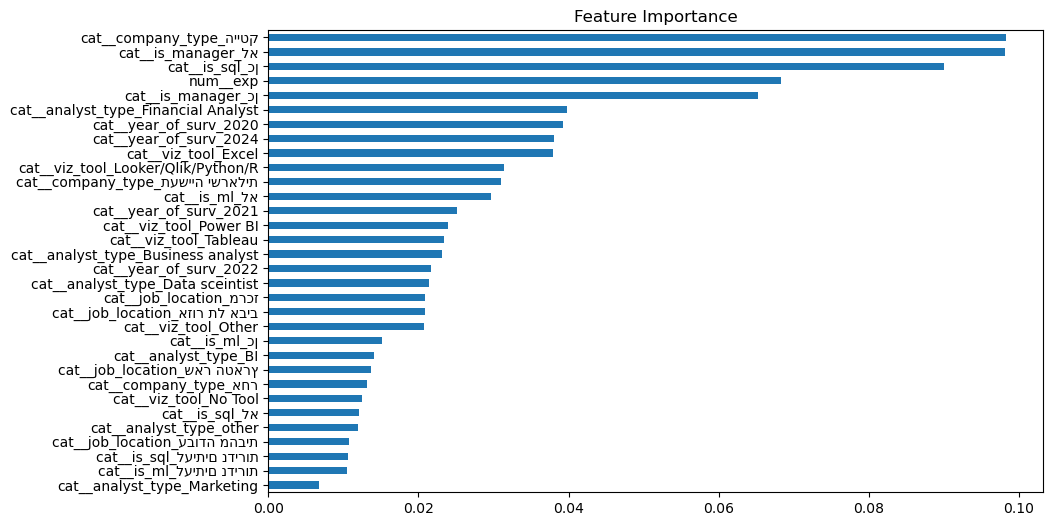

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming xgboost_adjusted is your trained XGBRegressor model
importances = xgboost_adjusted.feature_importances_

# Assuming you have the feature names accessible
# For example, if you used a ColumnTransformer with one-hot encoding,
# you might need to get the output feature names like so:
feature_names = preprocessor.get_feature_names_out()

# Create a pandas Series for easy plotting
feature_importance_series = pd.Series(importances, index=feature_names)

# Plotting
feature_importance_series.sort_values(ascending=True).plot.barh(figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

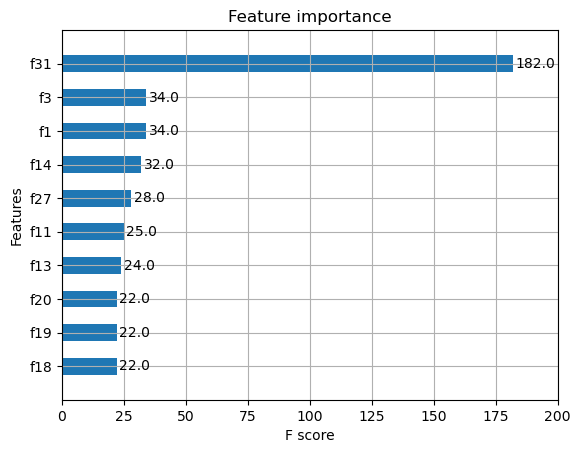

In [10]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
feature_names = preprocessor.get_feature_names_out()



# Plotting using 'weight', but you can also use 'gain' or 'cover'
plot_importance(xgboost_adjusted, importance_type='weight', max_num_features=10, height=0.5)
plt.show()


In [11]:
import numpy as np

top_x=20
sorted_indices = np.argsort(importances)[::-1]

# Select the top 10 most important feature indices
top_indices = sorted_indices[:top_x]

# Get the names of these top 10 features
top_feature_names = np.array(feature_names)[top_indices]

# Convert to list if you need a list specifically
top_feature_names = top_feature_names.tolist()

print("Top Most Important Features:", top_feature_names)

Top Most Important Features: ['cat__company_type_הייטק', 'cat__is_manager_לא', 'cat__is_sql_כן', 'num__exp', 'cat__is_manager_כן', 'cat__analyst_type_Financial Analyst', 'cat__year_of_surv_2020', 'cat__year_of_surv_2024', 'cat__viz_tool_Excel', 'cat__viz_tool_Looker/Qlik/Python/R', 'cat__company_type_תעשייה ישראלית', 'cat__is_ml_לא', 'cat__year_of_surv_2021', 'cat__viz_tool_Power BI', 'cat__viz_tool_Tableau', 'cat__analyst_type_Business analyst', 'cat__year_of_surv_2022', 'cat__analyst_type_Data sceintist', 'cat__job_location_מרכז', 'cat__job_location_אזור תל אביב']


In [12]:
from scipy.sparse import csr_matrix


def change_to_df(X_train_preprocessed,features):
# If X_train_preprocessed is a sparse matrix
    if isinstance(X_train_preprocessed, csr_matrix):
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed.toarray(), columns=feature_names)

    return X_train_preprocessed_df[features]

In [13]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from math import sqrt

# # Load your data


# # Drop unnecessary columns and convert 'year_of_surv' to a string
# data['year_of_surv'] = data['year_of_surv'].astype(str)
# col=['company_type','is_manager','is_sql','is_ml','year_of_surv','exp','viz_tool','job_location']
# # Identify categorical and numerical columns
# categorical_cols = data[col].select_dtypes(include=['object']).columns.tolist()
# numerical_cols = ['exp']

# # Preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
#         ('num', StandardScaler(), numerical_cols)

#     ])

# # Split the data
# X = data.drop('salary', axis=1)
# X = data[col]
# y = data['salary']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Apply preprocessing
# X_train_preprocessed = preprocessor.fit_transform(X_train)
# X_test_preprocessed = preprocessor.transform(X_test)
# X_train_preprocessed=change_to_df(X_train_preprocessed,top_feature_names)
# X_test_preprocessed=change_to_df(X_test_preprocessed,top_feature_names)
# # Initialize and train models
# models = {
#     "Linear Regression": LinearRegression(),
# #     "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(random_state=42)
# }

# for name, model in models.items():
#     model.fit(X_train_preprocessed, y_train)
#     y_train_pred = model.predict(X_train_preprocessed)
#     y_test_pred = model.predict(X_test_preprocessed)
    
#     train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
#     test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
#     print(f"{name} - Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")

# # Attempt to train an XGBoost model with adjusted parameters
# xgboost_adjusted = XGBRegressor(learning_rate= 0.1, max_depth= 4, n_estimators= 100,subsample= 0.8, random_state=42)
# xgboost_adjusted = XGBRegressor(n_estimators=100, max_depth=2, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)

# xgboost_adjusted.fit(X_train_preprocessed, y_train)
# y_train_pred_xgb_adj = xgboost_adjusted.predict(X_train_preprocessed)
# y_test_pred_xgb_adj = xgboost_adjusted.predict(X_test_preprocessed)

# train_rmse_xgb_adj = sqrt(mean_squared_error(y_train, y_train_pred_xgb_adj))
# test_rmse_xgb_adj = sqrt(mean_squared_error(y_test, y_test_pred_xgb_adj))
# print(f"XGBoost (Adjusted) - Train RMSE: {train_rmse_xgb_adj}, Test RMSE: {test_rmse_xgb_adj}")


In [14]:
col=['company_type','is_manager','is_sql','is_ml','year_of_surv','exp','viz_tool','job_location','analyst_type']
data.analyst_type.unique().tolist()



['Business analyst',
 'Financial Analyst',
 'Marketing',
 'Data sceintist',
 'other',
 'BI']

In [32]:
# dic={'company_type': 'הייטק', 'is_manager': 'כן', 'is_sql': 'כן', 'is_ml': 'כן','year_of_surv': '2024', 'exp':6 , 'viz_tool': 'Tableau', 'job_location': 'מרכז', 'analyst_type': 'Business analyst'}
# new_input_data=pd.DataFrame([list(dic.values())], 
#                             columns=['company_type','is_manager','is_sql','is_ml','year_of_surv','exp',
#                                      'viz_tool','job_location','analyst_type'])

# feature_names = preprocessor.get_feature_names_out()

# # Create a DataFrame template
# template_df = pd.DataFrame(columns=feature_names, dtype=float)
# template_df.loc[0] = 0.0  # Adding a row of zeros
# # Transform new input data
# new_input_transformed = preprocessor.transform(new_input_data)

# # If using a sparse matrix, convert to a dense format
# if scipy.sparse.issparse(new_input_transformed):
#     new_input_transformed_dense = new_input_transformed.toarray()
# else:
#     new_input_transformed_dense = new_input_transformed
# new_input_df = pd.DataFrame(new_input_transformed_dense, columns=preprocessor.get_feature_names_out())

# # new_input_df = pd.DataFrame(new_input_transformed_dense, columns=preprocessor.get_feature_names_out())
# new_input_df
# prediction_input = new_input_df.values  # Use this for prediction
# prediction = model.predict(prediction_input)

# prediction

array([33887.17466197])